# BHARAT INTERN

# MACHINE LEARNING TASK 2

# 2. WINE QULALITY PREDICTION

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('winequality-red.csv')

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine.
# finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


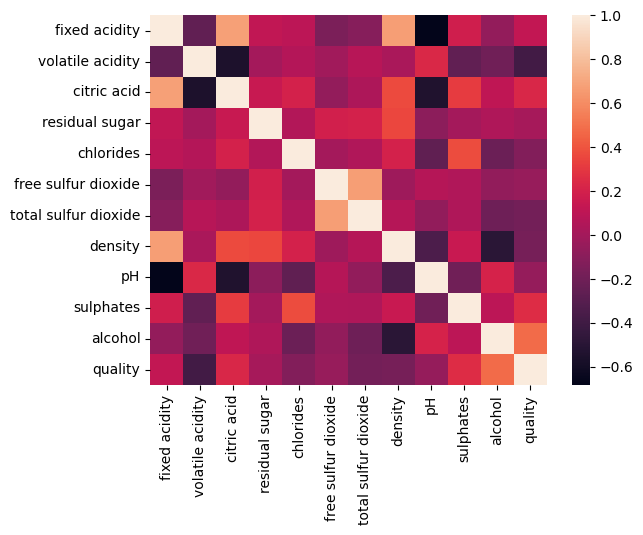

In [29]:
sns.heatmap(df.corr())
plt.show()

In [30]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [31]:
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [32]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [33]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4)

In [35]:


y_test.shape

(400,)

In [36]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([ 4.96819628e-02, -1.12900758e+00, -3.15544151e-01, -1.73799450e+00,
        5.92227607e-03, -3.28075876e-03, -1.73591221e+01, -3.31435389e-01,
        1.00325261e+00,  2.77220434e-01])

In [38]:
train_pred = regressor.predict(x_train)
train_pred

array([5.66086868, 5.49066329, 5.96298577, ..., 5.22512935, 5.3442602 ,
       5.63447898])

In [39]:
test_pred = regressor.predict(x_test)
test_pred

array([5.67202174, 5.34701289, 6.14086242, 6.15092423, 5.31333095,
       5.12179069, 4.82892906, 6.409382  , 5.12834989, 6.36929752,
       6.25194291, 6.36933905, 5.45193205, 5.65745037, 6.37855567,
       5.57008522, 5.29492457, 5.65908733, 5.21534762, 4.72758343,
       5.69403697, 5.45012573, 5.3928977 , 5.43862871, 6.36546209,
       5.08460532, 6.3151939 , 5.47239607, 5.47825776, 6.36820645,
       5.49435445, 5.26660464, 6.15498303, 5.60402428, 5.45948453,
       4.51764462, 6.50891447, 5.66228875, 6.14199137, 5.25400326,
       5.85541384, 6.3146954 , 6.10372986, 6.21108975, 5.47239607,
       6.46518375, 5.13811193, 5.5617585 , 5.31170848, 4.82666403,
       5.72987948, 5.83286834, 5.25439423, 5.16042175, 5.94693304,
       5.33101172, 5.81882097, 5.99136695, 5.96298577, 6.03816089,
       5.71925144, 5.91912191, 6.07916111, 5.38411575, 5.92172646,
       5.38633764, 6.03026606, 6.05524681, 5.38052693, 4.99636075,
       6.29214348, 4.8454469 , 6.30411747, 6.48425247, 5.19719

In [40]:
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.6500348380145408

In [41]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.6375220178009882

In [42]:

predicted_data = np.round_(test_pred)
predicted_data

array([6., 5., 6., 6., 5., 5., 5., 6., 5., 6., 6., 6., 5., 6., 6., 6., 5.,
       6., 5., 5., 6., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 5., 6., 6.,
       5., 5., 7., 6., 6., 5., 6., 6., 6., 6., 5., 6., 5., 6., 5., 5., 6.,
       6., 5., 5., 6., 5., 6., 6., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6.,
       5., 5., 6., 5., 6., 6., 5., 5., 5., 5., 5., 6., 6., 5., 5., 5., 6.,
       5., 6., 6., 7., 5., 6., 5., 6., 6., 7., 6., 5., 6., 6., 6., 5., 6.,
       5., 5., 5., 5., 6., 5., 4., 6., 5., 6., 5., 6., 6., 6., 7., 6., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 6., 5., 5., 6., 6., 6., 6., 6.,
       6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 8., 6., 7., 5., 6., 6., 6.,
       7., 6., 5., 5., 5., 5., 6., 6., 6., 6., 5., 5., 6., 6., 5., 5., 6.,
       5., 6., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 6., 5., 7., 6., 6.,
       6., 6., 6., 6., 6., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 5., 6.,
       7., 5., 5., 6., 6., 5., 6., 6., 6., 6., 5., 6., 6., 6., 6., 5., 5.,
       6., 6., 5., 5., 6.

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.4931719480169231
Mean Squared Error: 0.40643432318104344
Root Mean Squared Error: 0.6375220178009882


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred) 

0.3449824060580087

In [45]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients


,Coeffecient
fixed acidity,0.049682
volatile acidity,-1.129008
citric acid,-0.315544
chlorides,-1.737995
free sulfur dioxide,0.005922
total sulfur dioxide,-0.003281
density,-17.359122
pH,-0.331435
sulphates,1.003253
alcohol,0.277220
